## **1. What is Unsupervised Learning in Machine Learning?**

Unsupervised learning is a type of machine learning where the model learns patterns from **unlabeled data**.
There are no predefined outputs; the algorithm discovers hidden structures such as clusters or relationships.

**Examples:** Clustering, Association rules, Dimensionality reduction.

---

## **2. How does K-Means Clustering Algorithm work?**

K-Means groups data into **K clusters** by minimizing distance within clusters.

**Steps:**

1. Choose number of clusters (K).
2. Randomly initialize K centroids.
3. Assign each data point to nearest centroid.
4. Recalculate centroid as mean of assigned points.
5. Repeat steps 3–4 until centroids stop changing.

---

## **3. Explain the Concept of a Dendrogram in Hierarchical Clustering**

A dendrogram is a **tree-like diagram** showing how clusters merge or split at different distances.
It helps decide the number of clusters by cutting the tree at a chosen height.

---

## **4. Main Difference Between K-Means and Hierarchical Clustering**

| K-Means                 | Hierarchical Clustering        |
| ----------------------- | ------------------------------ |
| Requires predefined K   | No need to specify K initially |
| Fast for large datasets | Computationally expensive      |
| Uses centroids          | Uses distance hierarchy        |
| Flat clustering         | Tree-based clustering          |

---

## **5. Advantages of DBSCAN over K-Means**

* Detects clusters of **arbitrary shapes**.
* Automatically identifies **noise/outliers**.
* No need to specify number of clusters.
* Works well with uneven cluster sizes.

---

## **6. When Would You Use Silhouette Score in Clustering?**

Silhouette Score is used to:

* Evaluate clustering quality.
* Compare different numbers of clusters.
* Measure how well points fit within their cluster.

---

## **7. Limitations of Hierarchical Clustering**

* High computational cost.
* Not suitable for very large datasets.
* Sensitive to noise and outliers.
* Once merged/split, clusters cannot be undone.

---

## **8. Why is Feature Scaling Important in K-Means?**

K-Means uses **distance calculations**.
Features with large values dominate distance, causing incorrect clustering.
Scaling ensures all features contribute equally.

---

## **9. How does DBSCAN Identify Noise Points?**

DBSCAN labels a point as noise if:

* It does not have enough neighbors within a specified radius (eps).
* It is not reachable from any core point.

---

## **10. Define Inertia in K-Means**

Inertia is the **sum of squared distances** between each data point and its assigned centroid.
Lower inertia means tighter clusters.

---

## **11. What is the Elbow Method in K-Means?**

A technique to find optimal K:

1. Plot number of clusters vs inertia.
2. Choose the point where decrease sharply slows (elbow point).

---

## **12. Describe the Concept of “Density” in DBSCAN**

Density refers to how many points exist within a given radius (eps).
Clusters are formed where point density is high.

---

## **13. Can Hierarchical Clustering be Used on Categorical Data?**

Yes, if an appropriate **distance/similarity measure** (e.g., Hamming distance) is used instead of Euclidean distance.

---

## **14. What Does a Negative Silhouette Score Indicate?**

A negative score means:

* Data points are closer to another cluster than their own.
* Poor clustering or wrong number of clusters.

---

## **15. Explain “Linkage Criteria” in Hierarchical Clustering**

Linkage criteria determine distance between clusters:

* Single linkage → minimum distance
* Complete linkage → maximum distance
* Average linkage → average distance
* Ward linkage → minimizes variance

---

## **16. Why Might K-Means Perform Poorly with Varying Cluster Sizes/Densities?**

Because K-Means assumes:

* Clusters are spherical.
* Similar size and density.
  It struggles with irregular or uneven clusters.

---

## **17. Core Parameters in DBSCAN**

* **eps (ε):** Radius defining neighborhood size.
* **min_samples:** Minimum points required to form dense region.

These control cluster formation and noise detection.

---

## **18. How Does K-Means++ Improve Initialization?**

K-Means++ selects initial centroids **far apart**, reducing:

* Poor initialization
* Slow convergence
* Local minima problems

---

## **19. What is Agglomerative Clustering?**

A bottom-up hierarchical method:

1. Start with each data point as its own cluster.
2. Merge closest clusters step by step.
3. Continue until one cluster remains.

---

## **20. Why is Silhouette Score Better than Inertia?**

* Inertia only measures compactness.
* Silhouette Score measures both:

  * Cluster cohesion (within cluster)
  * Cluster separation (between clusters)

Hence it gives a more reliable evaluation.

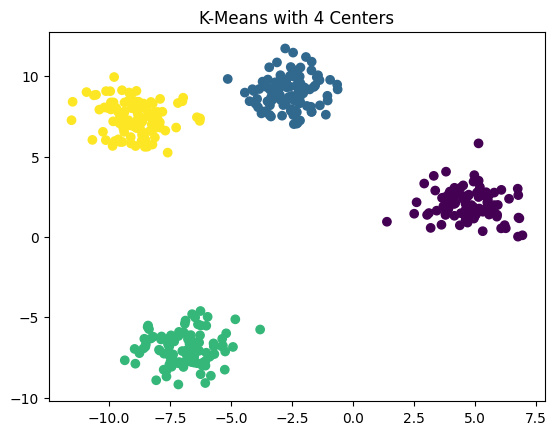

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=400, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("K-Means with 4 Centers")
plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

print("First 10 Predicted Labels:")
print(labels[:10])

First 10 Predicted Labels:
[1 1 1 1 1 1 1 1 1 1]


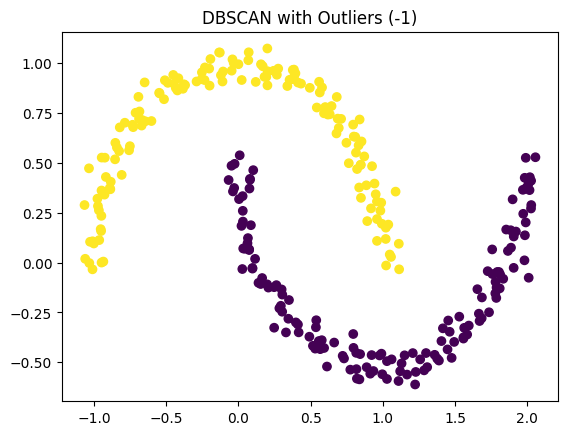

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.05)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN with Outliers (-1)")
plt.show()

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

print("Cluster sizes:")
print(np.bincount(labels))

Cluster sizes:
[65 51 62]


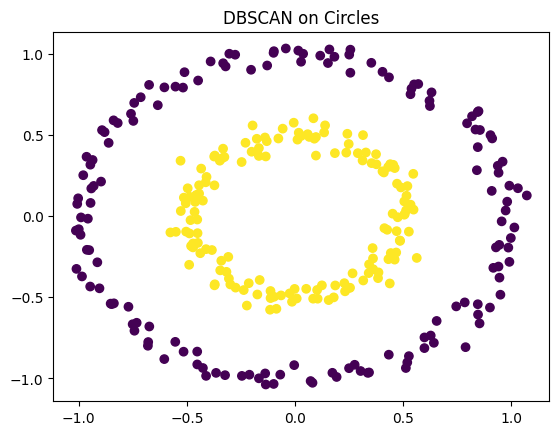

In [5]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5)

labels = DBSCAN(eps=0.2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN on Circles")
plt.show()

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

print("Cluster Centroids:")
print(kmeans.cluster_centers_)

Cluster Centroids:
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


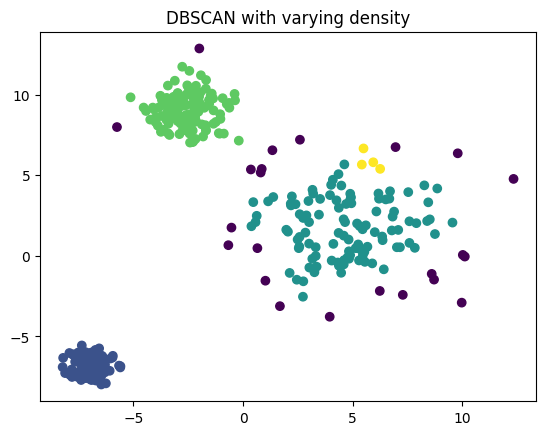

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=3,
                  cluster_std=[1.0,2.5,0.5], random_state=42)

labels = DBSCAN(eps=1.2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN with varying density")
plt.show()

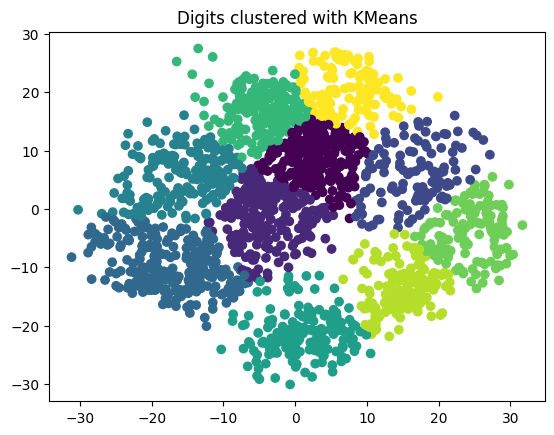

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)

labels = KMeans(n_clusters=10, random_state=42).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Digits clustered with KMeans")
plt.show()

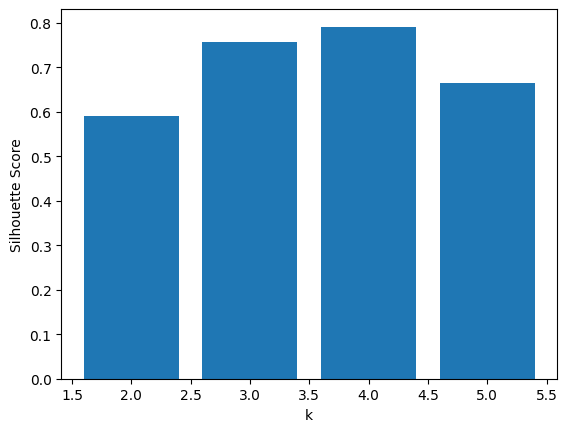

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X,_ = make_blobs(n_samples=300, centers=4, random_state=42)

scores=[]
ks=range(2,6)

for k in ks:
    labels = KMeans(n_clusters=k).fit_predict(X)
    scores.append(silhouette_score(X,labels))

plt.bar(ks,scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

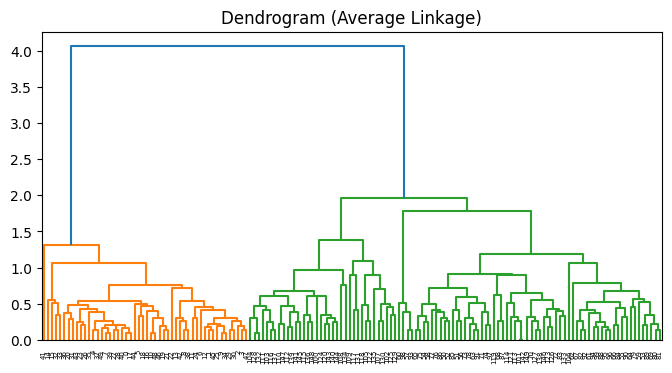

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
Z = linkage(iris.data, method='average')

plt.figure(figsize=(8,4))
dendrogram(Z)
plt.title("Dendrogram (Average Linkage)")
plt.show()

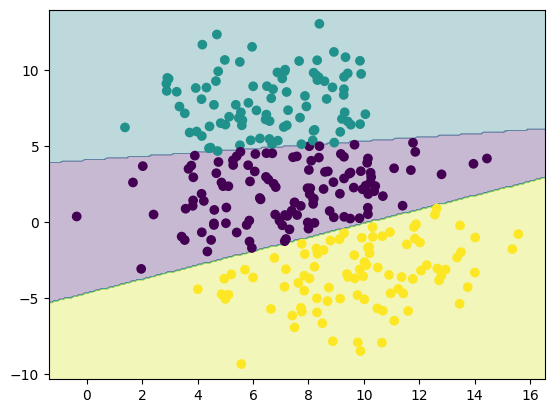

In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X,_ = make_blobs(n_samples=300, centers=3, cluster_std=2.5)

kmeans = KMeans(n_clusters=3).fit(X)

h=0.1
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

Z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.show()

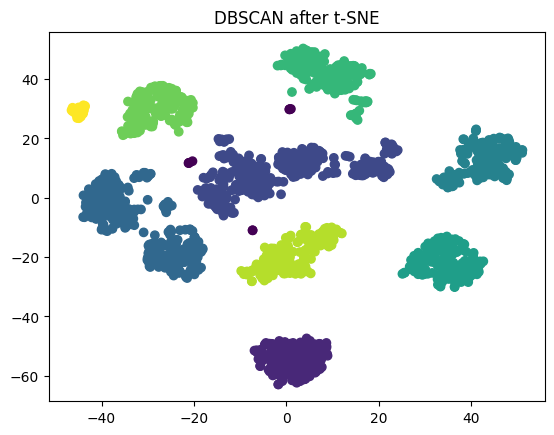

In [12]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

labels = DBSCAN(eps=5).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN after t-SNE")
plt.show()

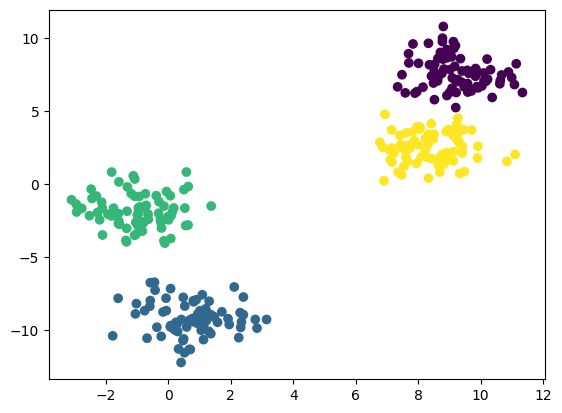

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X,_ = make_blobs(n_samples=300, centers=4)

labels = AgglomerativeClustering(n_clusters=4,
                                 linkage='complete').fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

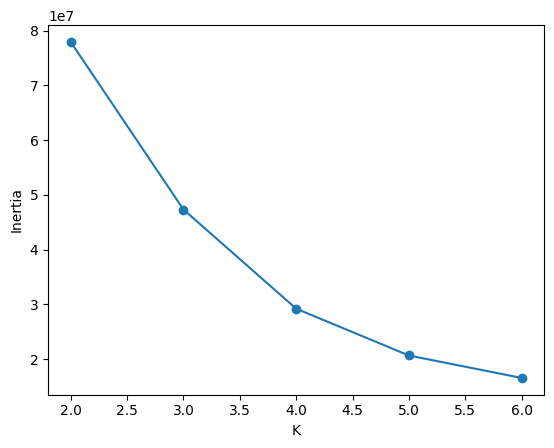

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = load_breast_cancer().data

inertia=[]
K=range(2,7)

for k in K:
    model=KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K,inertia,marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

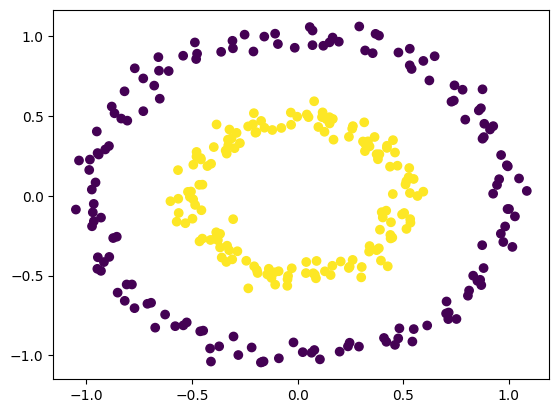

In [15]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X,_ = make_circles(n_samples=300, factor=0.5, noise=0.05)

labels = AgglomerativeClustering(n_clusters=2,
                                 linkage='single').fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X = StandardScaler().fit_transform(load_wine().data)

labels = DBSCAN(eps=1.5).fit_predict(X)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", clusters)

Number of clusters: 0


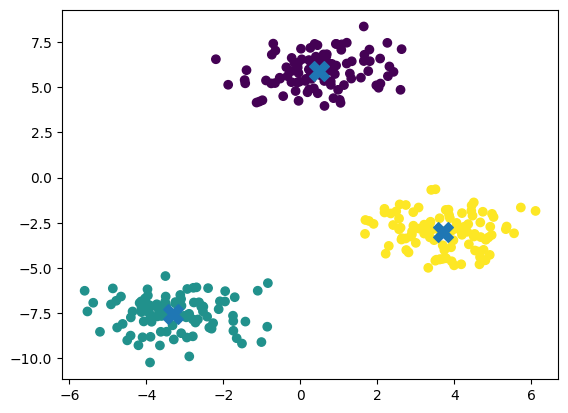

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X,_ = make_blobs(n_samples=300, centers=3)

kmeans = KMeans(n_clusters=3).fit(X)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=200, marker='X')
plt.show()

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

X = load_iris().data

labels = DBSCAN(eps=0.5).fit_predict(X)

noise = np.sum(labels == -1)
print("Noise samples:", noise)

Noise samples: 17


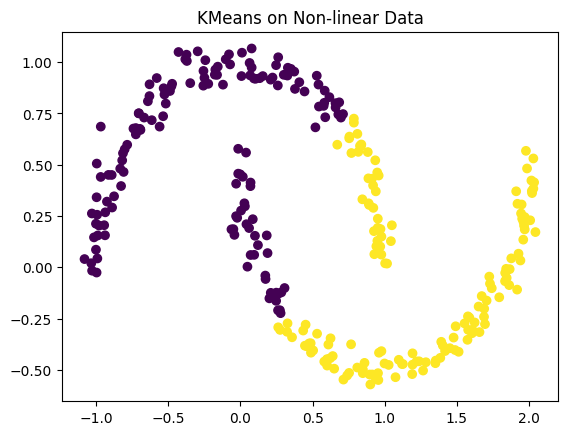

In [19]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X,_ = make_moons(n_samples=300, noise=0.05)

labels = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels)
plt.title("KMeans on Non-linear Data")
plt.show()

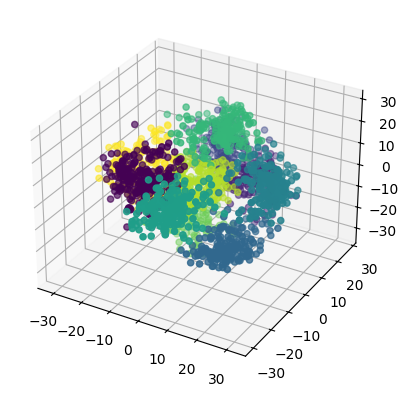

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = PCA(n_components=3).fit_transform(digits.data)

labels = KMeans(n_clusters=10).fit_predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=labels)
plt.show()

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate data
X, _ = make_blobs(n_samples=400, centers=5, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6771943882143446


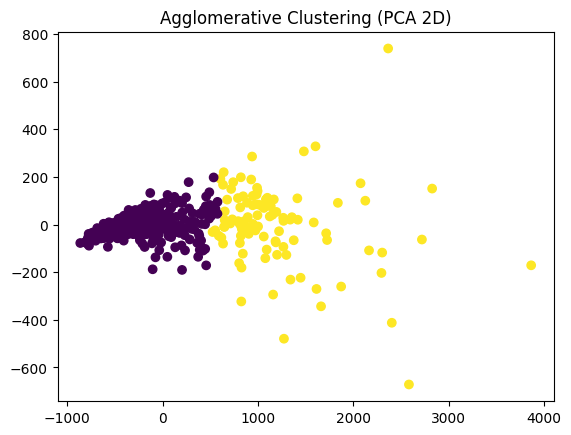

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

# Reduce to 2D
X_pca = PCA(n_components=2).fit_transform(X)

# Clustering
model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Agglomerative Clustering (PCA 2D)")
plt.show()

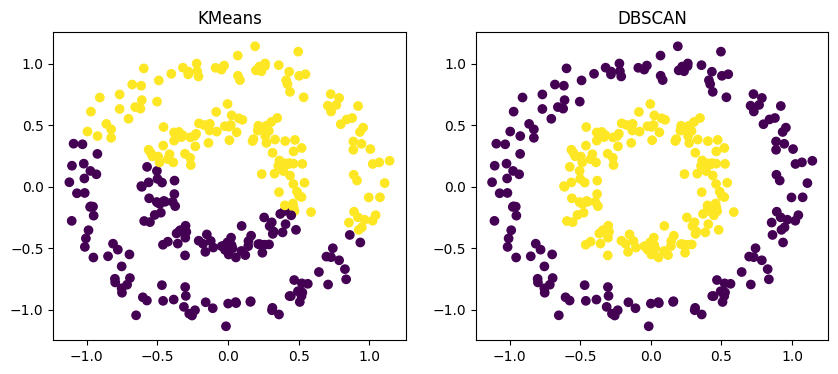

In [23]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X,_ = make_circles(n_samples=300, noise=0.08, factor=0.5)

kmeans_labels = KMeans(n_clusters=2).fit_predict(X)
dbscan_labels = DBSCAN(eps=0.2).fit_predict(X)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=kmeans_labels)
plt.title("KMeans")

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=dbscan_labels)
plt.title("DBSCAN")

plt.show()

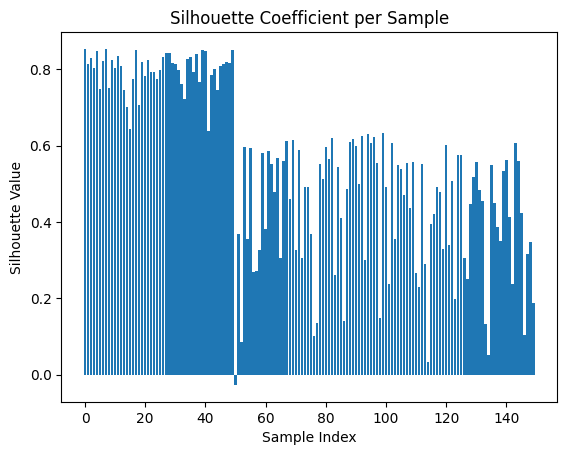

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)

sil_values = silhouette_samples(X, labels)

plt.bar(range(len(sil_values)), sil_values)
plt.title("Silhouette Coefficient per Sample")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Value")
plt.show()

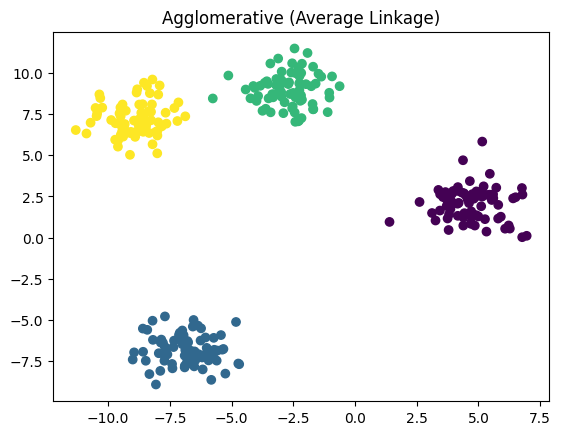

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X,_ = make_blobs(n_samples=300, centers=4, random_state=42)

labels = AgglomerativeClustering(
    n_clusters=4,
    linkage='average'
).fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels)
plt.title("Agglomerative (Average Linkage)")
plt.show()

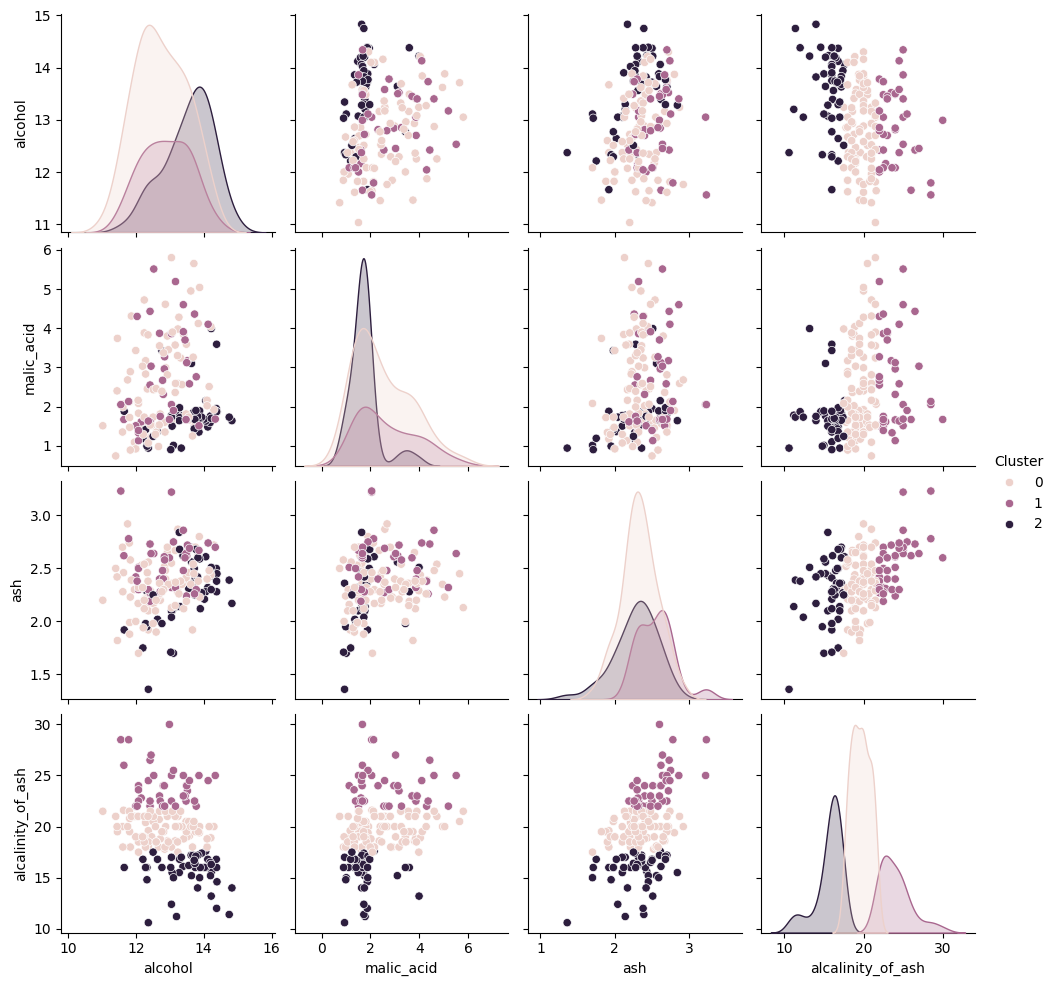

In [26]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Use first 4 features
X = df.iloc[:, :4]

labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
df["Cluster"] = labels

sns.pairplot(df, vars=df.columns[:4], hue="Cluster")

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X,_ = make_blobs(n_samples=400, centers=3,
                  cluster_std=2.0, random_state=42)

labels = DBSCAN(eps=1.5).fit_predict(X)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_points = np.sum(labels == -1)

print("Clusters found:", clusters)
print("Noise points:", noise_points)

Clusters found: 3
Noise points: 17


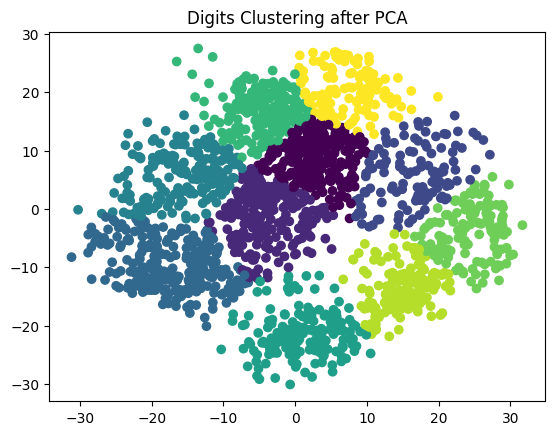

In [28]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()

# Reduce dimension
X = PCA(n_components=2).fit_transform(digits.data)

labels = KMeans(n_clusters=10, random_state=42).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Digits Clustering after PCA")
plt.show()